<a href="https://colab.research.google.com/github/sanghaimuskan/Breast-Cancer-Detection-using-KNN/blob/master/Breast_Cancer_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import files
data = files.upload()

Saving Breast_cancer.csv to Breast_cancer.csv


In [8]:
data = pd.read_csv('Breast_cancer.csv')
print (data.head(6))

         id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN
5    843786         M  ...                  0.12440          NaN

[6 rows x 33 columns]


## **Malignant and Benign are target values.**

*Malignant(M) means the person has cancer and Benign(B) means the person does not have cancer.*

 We are dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction

In [29]:
data = data.drop(['Unnamed: 32', 'id'], axis = 1)
data.shape

(569, 31)

## **Convert M =1 and B=0 for our ease.**

In [11]:
def diagnosis_value(diagnosis):
  if diagnosis == 'M':
    return 1
  else:
    return 0

data['diagnosis'] = data['diagnosis'].apply(diagnosis_value)

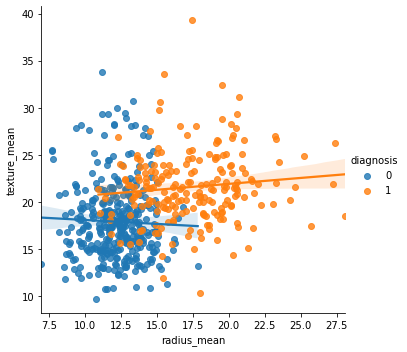

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data)


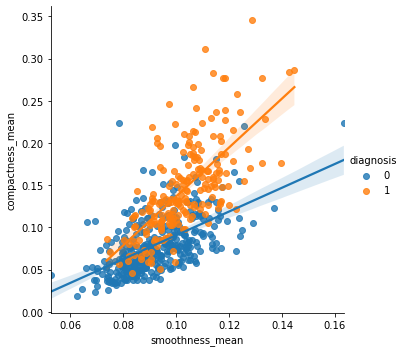

In [15]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',data = data, hue = 'diagnosis') 

In [39]:
data.dropna() #dropping all rowa containg na values

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
X = np.array(data.iloc[:, 1:])
y = np.array(data['diagnosis'])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

X_train

array([[1.374e+01, 1.791e+01, 8.812e+01, ..., 6.019e-02, 2.350e-01,
        7.014e-02],
       [1.337e+01, 1.639e+01, 8.610e+01, ..., 8.978e-02, 2.048e-01,
        7.628e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

### **I have used K Nearest Neighbour to predict the output.**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [35]:
knn.score(X_test, y_test)

0.9649122807017544

## We will use cross validation to check which K would have been best for the algorithm.

In [37]:
neighbors =[]
cv_scores=[]

from sklearn.model_selection import cross_val_score

for k in range(1, 41, 2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train,y_train, cv = 10, scoring = 'accuracy')
  cv_scores.append(scores.mean())

The optimal number of neighbors is  13 


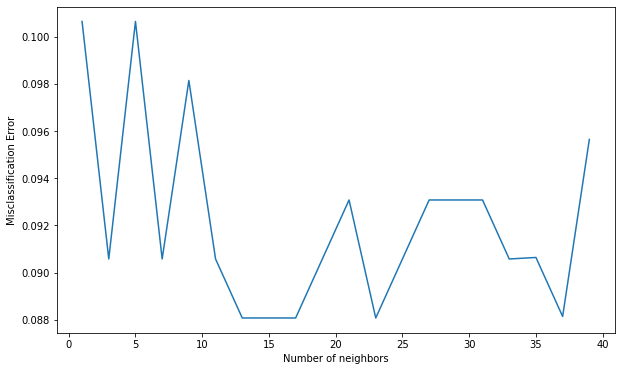

In [38]:
MSE = [1-x for x in cv_scores]

optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
  
# plot misclassification error versus k 
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show()
